In [13]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import os 
import numpy as np

In [2]:
data_dir = "dataset"  # Update with your actual path
img_size = (224, 224)  # Resize images for CNN
batch_size = 32

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=42
)


Found 1944 files belonging to 15 classes.
Using 1556 files for training.
Found 1944 files belonging to 15 classes.
Using 388 files for validation.


In [4]:
class_names = train_ds.class_names
print("Classes:", class_names)


Classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


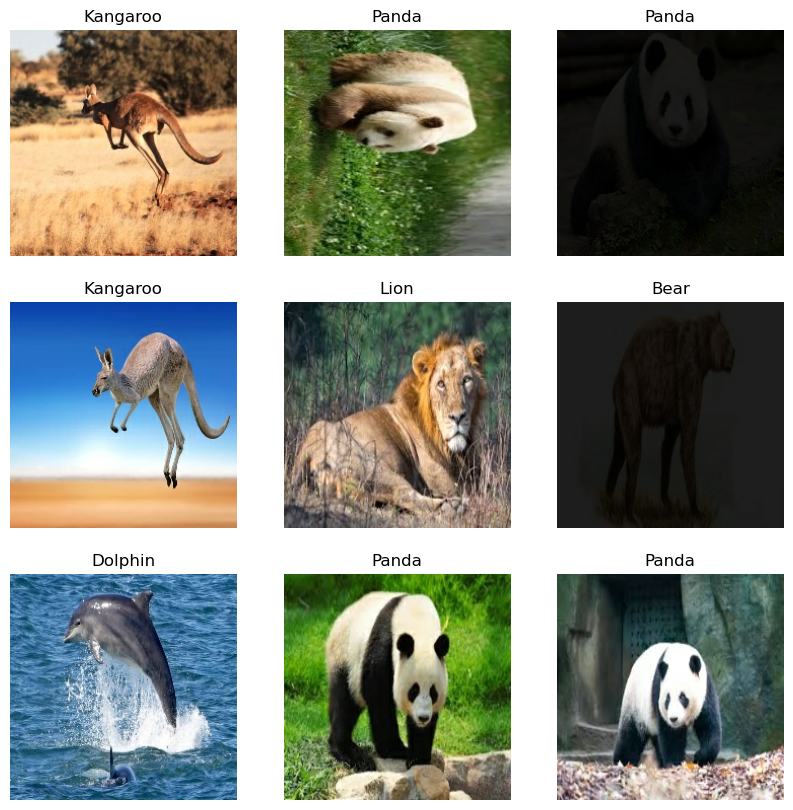

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):  
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [6]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(class_names), activation='softmax')  # Output layer with class count
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.1115 - loss: 2.9232 - val_accuracy: 0.2397 - val_loss: 2.4098
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.2726 - loss: 2.3051 - val_accuracy: 0.3763 - val_loss: 1.9539
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4468 - loss: 1.7532 - val_accuracy: 0.5464 - val_loss: 1.6257
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.6617 - loss: 1.1671 - val_accuracy: 0.5876 - val_loss: 1.6866
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8223 - loss: 0.6204 - val_accuracy: 0.6856 - val_loss: 1.5211
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9243 - loss: 0.3106 - val_accuracy: 0.7113 - val_loss: 1.4772
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9112 - loss: 0.3134 - val_accuracy: 0.7191 - val_loss: 2.1207
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9576 - loss: 0.2163 - val_accuracy: 0.7242 - val_loss:

In [9]:
model.evaluate(val_ds)
model.save("animal_classification_model.h5")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - accuracy: 0.7738 - loss: 2.1582


In [10]:
from tensorflow.keras.models import load_model

In [11]:
import cv2

def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize to match model input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [14]:
def predict_animal(image_path):
    img = preprocess_image(image_path)  # Preprocess image
    prediction = model.predict(img)  # Get predictions
    class_index = np.argmax(prediction)  # Get highest probability class
    return class_names[class_index]  # Return class name

# Example Usage:
image_path = "giraffe.jpg"  # Replace with the actual image path
predicted_animal = predict_animal(image_path)
print(f"Predicted Animal: {predicted_animal}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted Animal: Giraffe
